https://www.turing.com/kb/document-classification-using-naive-bayes

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [2]:
# Now Load the dataset
data_ = fetch_20newsgroups()
# Get the text categories in action
text_categories_ = data_.target_names
# Now we define the training set
train_data_ = fetch_20newsgroups(subset="train", categories=text_categories_)
# define the test set
test_data_ = fetch_20newsgroups(subset="test", categories=text_categories_)

In [7]:
print("Number of unique classes {}".format(len(text_categories_)))
print("Number of training samples {} ".format(len(train_data_.data)))
print("Number of test samples {}".format(len(test_data_.data)))

Number of unique classes 20
Number of training samples 11314 
Number of test samples 7532


In [9]:
print(test_data_.data[3])

From: bakken@cs.arizona.edu (Dave Bakken)
Subject: Re: Saudi clergy condemns debut of human rights group!
Keywords: international, non-usa government, government, civil rights, 	social issues, politics
Organization: U of Arizona CS Dept, Tucson
Lines: 101

In article <benali.737307554@alcor> benali@alcor.concordia.ca ( ILYESS B. BDIRA ) writes:
>It looks like Ben Baz's mind and heart are also blind, not only his eyes.
>I used to respect him, today I lost the minimal amount of respect that
>I struggled to keep for him.
>To All Muslim netters: This is the same guy who gave a "Fatwah" that
>Saudi Arabia can be used by the United Ststes to attack Iraq . 

They were attacking the Iraqis to drive them out of Kuwait,
a country whose citizens have close blood and business ties
to Saudi citizens.  And me thinks if the US had not helped out
the Iraqis would have swallowed Saudi Arabia, too (or at 
least the eastern oilfields).  And no Muslim country was doing
much of anything to help liberate Ku

In [10]:
# Model building
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [12]:
model.fit(train_data_.data, train_data_.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [13]:
predicted_categories = model.predict(test_data_.data)

In [17]:
print(np.array(test_data_.target_names)[predicted_categories])
#array(['rec.autos', 'sci.crypt', 'alt.atheism', ..., 'rec.sport.baseball','comp.sys.ibm.pc.hardware', 'soc.religion.christian'],dtype='<U24')

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


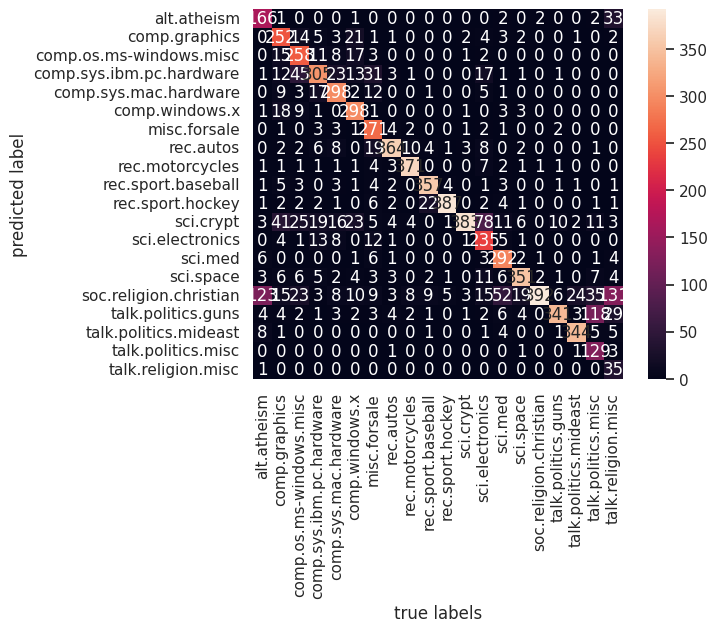

In [22]:
# plotting the confusion matrix
mat = confusion_matrix(test_data_.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data_.target_names,yticklabels=train_data_.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()


In [23]:
print("Accuracy: {}".format(accuracy_score(test_data_.target, predicted_categories)))

Accuracy: 0.7738980350504514
